In [1]:
import os
print("Current dir: "+os.getcwd())
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Model
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import scikitplot as skplt
import PIL
from numpy import asarray
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from keras import regularizers



Current dir: C:\Users\user


Using TensorFlow backend.


#from keras import layers
#from keras.models import Model
#from keras.regularizers import l1
#in_shape=(227,227,3)
#n_classes=2
opt='sgd'
in_layer = layers.Input(in_shape)
conv1 = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
pool1 = layers.MaxPool2D(3, 2)(conv1)
conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
pool2 = layers.MaxPool2D(3, 2)(conv2)
conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
conv4 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
pool3 = layers.MaxPool2D(3, 2)(conv4)
flattened = layers.Flatten()(pool3)
dense1 = layers.Dense(4096, activation='relu')(flattened)
drop1 = layers.Dropout(0.5)(dense1)
dense2 = layers.Dense(4096, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(dense2)
preds = layers.Dense(n_classes, activation='softmax')(drop2)
model = Model(in_layer, preds)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(96, 11, strides=4,activation='relu', input_shape=(227,227,3)),
    keras.layers.MaxPool2D(3,2),
    keras.layers.Conv2D(256,5,strides=1,padding='same',activation='relu'),
    keras.layers.MaxPool2D(3,2),
    keras.layers.Conv2D(384, 3, strides=1, padding='same', activation='relu'),
    keras.layers.Conv2D(256, 3, strides=1, padding='same', activation='relu'),
    keras.layers.MaxPool2D(3, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dropout(0.55),
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dropout(0.55),
    keras.layers.Dense(2, activation='softmax')
])


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 256)       884992    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 256)        

In [5]:
from keras.optimizers import RMSprop
model.compile(loss="categorical_crossentropy", optimizer='RMSprop',metrics=["accuracy"])

In [6]:
import os
os.chdir(r'C:\Users\user\Downloads\Dataset\Train Images')
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.9919):
            print('cancelling since validation accuracy has been reached to 99.2%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path_train=os.getcwd()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation Images")
path_validation=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest')
train_data=train_gen.flow_from_directory(path_train,target_size=(227,227),batch_size=50)
validation_gen=ImageDataGenerator(rescale=1/255)
validation_data=validation_gen.flow_from_directory(path_validation,target_size=(227,227),batch_size=10)
model.fit_generator(train_data,epochs=30,validation_data=validation_data,callbacks=[callbacks_3])
model.save("model4.h5")

Found 10998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
220/220 [==============================] - 191s 869ms/step - loss: 22.2202 - accuracy: 0.4982 - val_loss: 2.0056 - val_accuracy: 0.5000
Epoch 2/30
220/220 [==============================] - 328s 1s/step - loss: 2.1152 - accuracy: 0.4993 - val_loss: 2.0648 - val_accuracy: 0.5000
Epoch 3/30
220/220 [==============================] - 328s 1s/step - loss: 2.1239 - accuracy: 0.4992 - val_loss: 2.1180 - val_accuracy: 0.7010
Epoch 4/30
220/220 [==============================] - 327s 1s/step - loss: 2.0920 - accuracy: 0.5030 - val_loss: 2.0538 - val_accuracy: 0.5000
Epoch 5/30
220/220 [==============================] - 332s 2s/step - loss: 2.1416 - accuracy: 0.4989 - val_loss: 2.0481 - val_accuracy: 0.5000
Epoch 6/30
220/220 [==============================] - 330s 2s/step - loss: 2.9331 - accuracy: 0.7624 - val_loss: 1.9559 - val_accuracy: 0.7140
Epoch 7/30
220/220 [==============================] -

# Evaluating model performance on Training Set

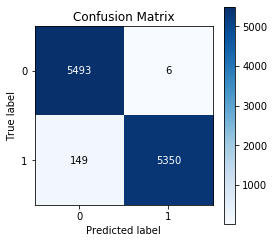

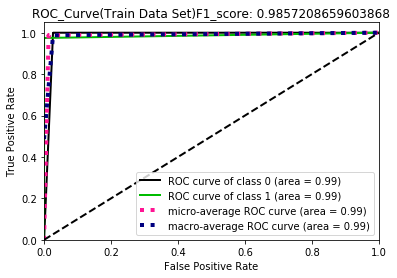

In [7]:

os.chdir(r"C:\Users\user\Downloads\Dataset")
path=os.getcwd()
model=load_model("model4.h5")
train=pd.read_csv("train_.csv")
train_images=train['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\train_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_train=[]
for file in train_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_train.append(model.predict(img))
y_prob_np_train=np.array(y_prob_train)
y_prob_np_train=y_prob_np_train.reshape(10998,2)
y_pred_np_train=y_prob_np_train.argmax(axis=1)
train_labels=train['Class']
y_train=np.array(train_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_pred_np_train,figsize=(4,4))
skplt.metrics.plot_roc(y_train,y_prob_np_train,title="ROC_Curve(Train Data Set)F1_score: "+str(f1_score(y_train,y_pred_np_train)))

# Evaluating model performance on Validation Set

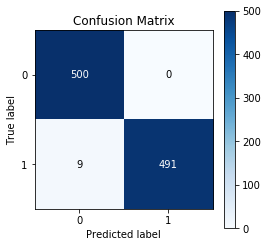

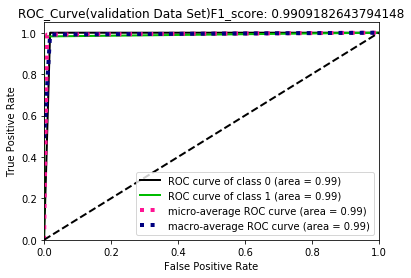

In [9]:
os.chdir(r"C:\Users\user\Downloads\Dataset")
validation=pd.read_csv("validation_.csv")
validation_images=validation['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_validation=[]
for file in validation_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_validation.append(model.predict(img))
y_prob_np_validation=np.array(y_prob_validation)
y_prob_np_validation=y_prob_np_validation.reshape(1000,2)
y_pred_np_validation=y_prob_np_validation.argmax(axis=1)
validation_labels=validation['Class']
y_validation=np.array(validation_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_np_validation,figsize=(4,4))
skplt.metrics.plot_roc(y_validation,y_prob_np_validation,title="ROC_Curve(validation Data Set)F1_score: "+str(f1_score(y_validation,y_pred_np_validation)))


# Attempt 2: Upto 99.2% Validation Accuracy

In [2]:
import os
os.chdir(r'C:\Users\user\Downloads\Dataset')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
model=load_model("model4.h5")
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.9929):
            print('cancelling since validation accuracy has been reached to 99.2%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path_train=os.getcwd()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation Images")
path_validation=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest')
train_data=train_gen.flow_from_directory(path_train,target_size=(227,227),batch_size=50)
validation_gen=ImageDataGenerator(rescale=1/255)
validation_data=validation_gen.flow_from_directory(path_validation,target_size=(227,227),batch_size=10)
model.fit_generator(train_data,epochs=30,validation_data=validation_data,callbacks=[callbacks_3])
os.chdir(r"C:\Users\user\Downloads\Dataset")
model.save("model5.h5")

Found 10998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
220/220 [==============================] - 177s 804ms/step - loss: 2.0648 - accuracy: 0.9215 - val_loss: 1.4068 - val_accuracy: 0.9790
Epoch 2/30
220/220 [==============================] - 155s 702ms/step - loss: 1.6226 - accuracy: 0.9494 - val_loss: 1.4150 - val_accuracy: 0.9860
Epoch 3/30
220/220 [==============================] - 158s 718ms/step - loss: 1.8615 - accuracy: 0.9431 - val_loss: 1.4437 - val_accuracy: 0.9870
Epoch 4/30
220/220 [==============================] - 154s 699ms/step - loss: 1.6823 - accuracy: 0.9522 - val_loss: 1.4154 - val_accuracy: 0.9860
Epoch 5/30
220/220 [==============================] - 160s 726ms/step - loss: 1.7995 - accuracy: 0.9574 - val_loss: 1.4650 - val_accuracy: 0.9930
cancelling since validation accuracy has been reached to 99.2%


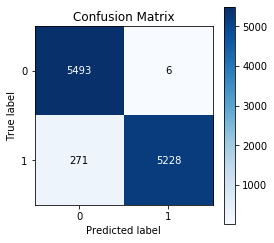

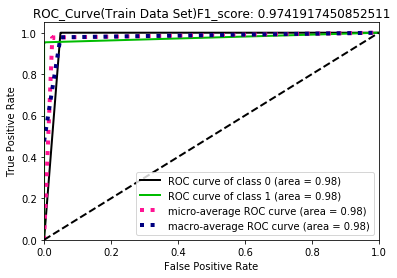

In [4]:

os.chdir(r"C:\Users\user\Downloads\Dataset")
path=os.getcwd()
model=load_model("model5.h5")
train=pd.read_csv("train_.csv")
train_images=train['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\train_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_train=[]
for file in train_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_train.append(model.predict(img))
y_prob_np_train=np.array(y_prob_train)
y_prob_np_train=y_prob_np_train.reshape(10998,2)
y_pred_np_train=y_prob_np_train.argmax(axis=1)
train_labels=train['Class']
y_train=np.array(train_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_pred_np_train,figsize=(4,4))
skplt.metrics.plot_roc(y_train,y_prob_np_train,title="ROC_Curve(Train Data Set)F1_score: "+str(f1_score(y_train,y_pred_np_train)))

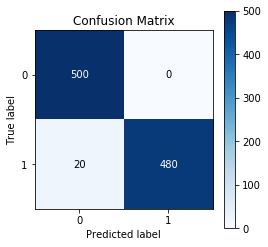

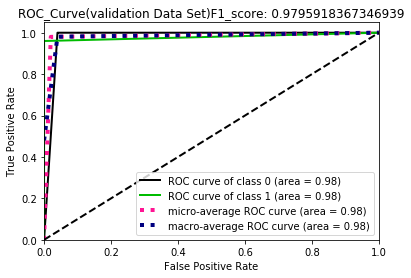

In [5]:
os.chdir(r"C:\Users\user\Downloads\Dataset")
validation=pd.read_csv("validation_.csv")
validation_images=validation['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_validation=[]
for file in validation_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_validation.append(model.predict(img))
y_prob_np_validation=np.array(y_prob_validation)
y_prob_np_validation=y_prob_np_validation.reshape(1000,2)
y_pred_np_validation=y_prob_np_validation.argmax(axis=1)
validation_labels=validation['Class']
y_validation=np.array(validation_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_np_validation,figsize=(4,4))
skplt.metrics.plot_roc(y_validation,y_prob_np_validation,title="ROC_Curve(validation Data Set)F1_score: "+str(f1_score(y_validation,y_pred_np_validation)))


# Lets increase the penalty parameter and dropout rate and train upto 99.4% valiation accuracy

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(96, 11, strides=4,activation='relu', input_shape=(227,227,3)),
    keras.layers.MaxPool2D(3,2),
    keras.layers.Conv2D(256,5,strides=1,padding='same',activation='relu'),
    keras.layers.MaxPool2D(3,2),
    keras.layers.Conv2D(384, 3, strides=1, padding='same', activation='relu'),
    keras.layers.Conv2D(256, 3, strides=1, padding='same', activation='relu'),
    keras.layers.MaxPool2D(3, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.5)),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.5)),
    keras.layers.Dropout(0.55),
    keras.layers.Dense(2, activation='softmax')
])
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [6]:
import os
os.chdir(r'C:\Users\user\Downloads\Dataset')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.9939):
            print('cancelling since validation accuracy has been reached to 99.4%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path_train=os.getcwd()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation Images")
path_validation=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest')
train_data=train_gen.flow_from_directory(path_train,target_size=(227,227),batch_size=50)
validation_gen=ImageDataGenerator(rescale=1/255)
validation_data=validation_gen.flow_from_directory(path_validation,target_size=(227,227),batch_size=10)
history=model.fit_generator(train_data,epochs=30,validation_data=validation_data,callbacks=[callbacks_3])
os.chdir(r"C:\Users\user\Downloads\Dataset")
model.save("model6.h5")

Found 10998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
220/220 [==============================] - 338s 2s/step - loss: 92.8153 - accuracy: 0.4927 - val_loss: 7.5008 - val_accuracy: 0.5000
Epoch 2/30
220/220 [==============================] - 328s 1s/step - loss: 7.5027 - accuracy: 0.4971 - val_loss: 7.5243 - val_accuracy: 0.5000
Epoch 3/30
220/220 [==============================] - 339s 2s/step - loss: 7.5086 - accuracy: 0.4935 - val_loss: 7.4914 - val_accuracy: 0.5000
Epoch 4/30
220/220 [==============================] - 223s 1s/step - loss: 7.7280 - accuracy: 0.4970 - val_loss: 6.9772 - val_accuracy: 0.5000
Epoch 5/30
220/220 [==============================] - 170s 774ms/step - loss: 7.5021 - accuracy: 0.4985 - val_loss: 7.4486 - val_accuracy: 0.5000
Epoch 6/30
220/220 [==============================] - 171s 779ms/step - loss: 7.5275 - accuracy: 0.5074 - val_loss: 7.4937 - val_accuracy: 0.5000
Epoch 7/30
220/220 [==============================

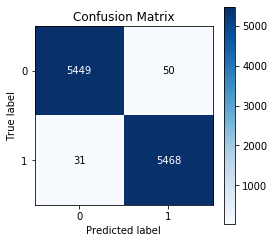

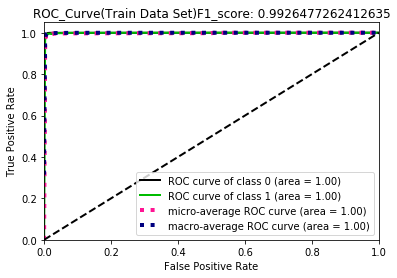

In [7]:

os.chdir(r"C:\Users\user\Downloads\Dataset")
path=os.getcwd()
model=load_model("model6.h5")
train=pd.read_csv("train_.csv")
train_images=train['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\train_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_train=[]
for file in train_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_train.append(model.predict(img))
y_prob_np_train=np.array(y_prob_train)
y_prob_np_train=y_prob_np_train.reshape(10998,2)
y_pred_np_train=y_prob_np_train.argmax(axis=1)
train_labels=train['Class']
y_train=np.array(train_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_pred_np_train,figsize=(4,4))
skplt.metrics.plot_roc(y_train,y_prob_np_train,title="ROC_Curve(Train Data Set)F1_score: "+str(f1_score(y_train,y_pred_np_train)))

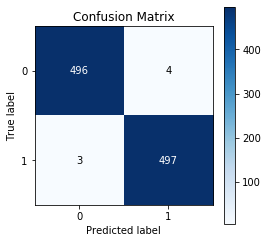

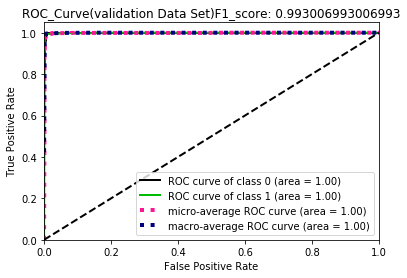

In [8]:
os.chdir(r"C:\Users\user\Downloads\Dataset")
validation=pd.read_csv("validation_.csv")
validation_images=validation['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_validation=[]
for file in validation_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_validation.append(model.predict(img))
y_prob_np_validation=np.array(y_prob_validation)
y_prob_np_validation=y_prob_np_validation.reshape(1000,2)
y_pred_np_validation=y_prob_np_validation.argmax(axis=1)
validation_labels=validation['Class']
y_validation=np.array(validation_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_np_validation,figsize=(4,4))
skplt.metrics.plot_roc(y_validation,y_prob_np_validation,title="ROC_Curve(validation Data Set)F1_score: "+str(f1_score(y_validation,y_pred_np_validation)))


# Attempt :4 Let's train upto 99.6% validation accuracy

In [2]:
import os
os.chdir(r'C:\Users\user\Downloads\Dataset')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
model=load_model("model6.h5")
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.9959):
            print('cancelling since validation accuracy has been reached to 99.6%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path_train=os.getcwd()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation Images")
path_validation=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest')
train_data=train_gen.flow_from_directory(path_train,target_size=(227,227),batch_size=50)
validation_gen=ImageDataGenerator(rescale=1/255)
validation_data=validation_gen.flow_from_directory(path_validation,target_size=(227,227),batch_size=10)
history=model.fit_generator(train_data,epochs=30,validation_data=validation_data,callbacks=[callbacks_3])
os.chdir(r"C:\Users\user\Downloads\Dataset")
model.save("model7.h5")

Found 10998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
220/220 [==============================] - 185s 839ms/step - loss: 7.1815 - accuracy: 0.9606 - val_loss: 6.8684 - val_accuracy: 0.9970
cancelling since validation accuracy has been reached to 99.6%


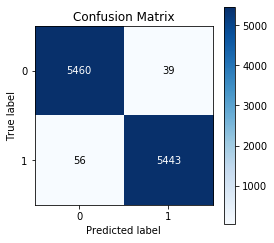

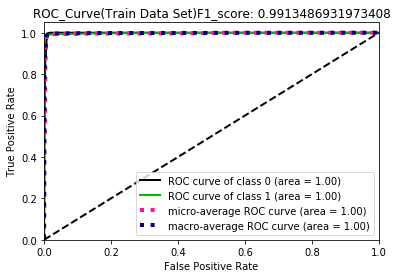

In [3]:

os.chdir(r"C:\Users\user\Downloads\Dataset")
path=os.getcwd()
model=load_model("model7.h5")
train=pd.read_csv("train_.csv")
train_images=train['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\train_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_train=[]
for file in train_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_train.append(model.predict(img))
y_prob_np_train=np.array(y_prob_train)
y_prob_np_train=y_prob_np_train.reshape(10998,2)
y_pred_np_train=y_prob_np_train.argmax(axis=1)
train_labels=train['Class']
y_train=np.array(train_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_pred_np_train,figsize=(4,4))
skplt.metrics.plot_roc(y_train,y_prob_np_train,title="ROC_Curve(Train Data Set)F1_score: "+str(f1_score(y_train,y_pred_np_train)))

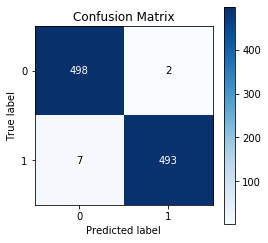

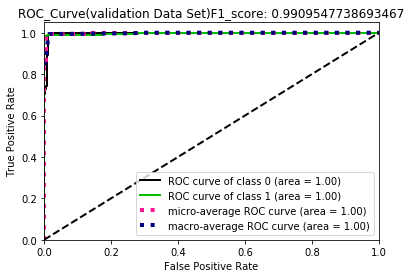

In [4]:
os.chdir(r"C:\Users\user\Downloads\Dataset")
validation=pd.read_csv("validation_.csv")
validation_images=validation['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_validation=[]
for file in validation_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_validation.append(model.predict(img))
y_prob_np_validation=np.array(y_prob_validation)
y_prob_np_validation=y_prob_np_validation.reshape(1000,2)
y_pred_np_validation=y_prob_np_validation.argmax(axis=1)
validation_labels=validation['Class']
y_validation=np.array(validation_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_np_validation,figsize=(4,4))
skplt.metrics.plot_roc(y_validation,y_prob_np_validation,title="ROC_Curve(validation Data Set)F1_score: "+str(f1_score(y_validation,y_pred_np_validation)))


# Training upto 99.9% validation accuracy

In [5]:
import os
os.chdir(r'C:\Users\user\Downloads\Dataset')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
model=load_model("model7.h5")
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.9989):
            print('cancelling since validation accuracy has been reached to 99.9%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path_train=os.getcwd()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation Images")
path_validation=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest')
train_data=train_gen.flow_from_directory(path_train,target_size=(227,227),batch_size=50)
validation_gen=ImageDataGenerator(rescale=1/255)
validation_data=validation_gen.flow_from_directory(path_validation,target_size=(227,227),batch_size=10)
history=model.fit_generator(train_data,epochs=30,validation_data=validation_data,callbacks=[callbacks_3])
os.chdir(r"C:\Users\user\Downloads\Dataset")
model.save("model8.h5")

Found 10998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
220/220 [==============================] - 340s 2s/step - loss: 7.2016 - accuracy: 0.9661 - val_loss: 7.9783 - val_accuracy: 0.9920
Epoch 2/30
220/220 [==============================] - 328s 1s/step - loss: 7.2369 - accuracy: 0.9674 - val_loss: 6.8720 - val_accuracy: 0.9950
Epoch 3/30
220/220 [==============================] - 331s 2s/step - loss: 7.0790 - accuracy: 0.9744 - val_loss: 6.8624 - val_accuracy: 0.9590
Epoch 4/30
220/220 [==============================] - 330s 2s/step - loss: 7.2589 - accuracy: 0.9689 - val_loss: 8.1748 - val_accuracy: 0.9980
Epoch 5/30
220/220 [==============================] - 329s 1s/step - loss: 7.0820 - accuracy: 0.9700 - val_loss: 6.8133 - val_accuracy: 0.9920
Epoch 6/30
220/220 [==============================] - 329s 1s/step - loss: 7.3519 - accuracy: 0.9684 - val_loss: 6.7852 - val_accuracy: 0.9900
Epoch 7/30
220/220 [==============================] - 335

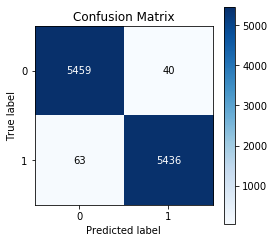

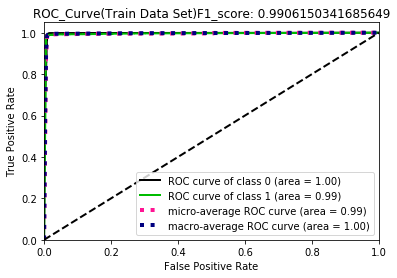

In [6]:

os.chdir(r"C:\Users\user\Downloads\Dataset")
path=os.getcwd()
model=load_model("model8.h5")
train=pd.read_csv("train_.csv")
train_images=train['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\train_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_train=[]
for file in train_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_train.append(model.predict(img))
y_prob_np_train=np.array(y_prob_train)
y_prob_np_train=y_prob_np_train.reshape(10998,2)
y_pred_np_train=y_prob_np_train.argmax(axis=1)
train_labels=train['Class']
y_train=np.array(train_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_pred_np_train,figsize=(4,4))
skplt.metrics.plot_roc(y_train,y_prob_np_train,title="ROC_Curve(Train Data Set)F1_score: "+str(f1_score(y_train,y_pred_np_train)))

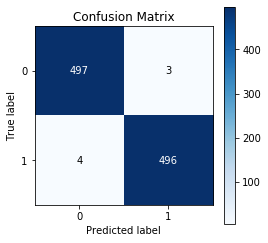

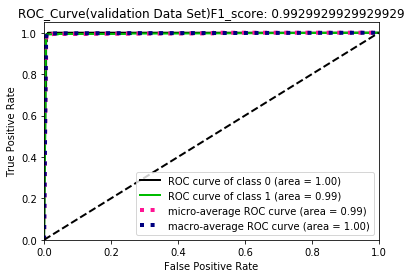

In [7]:
os.chdir(r"C:\Users\user\Downloads\Dataset")
validation=pd.read_csv("validation_.csv")
validation_images=validation['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_validation=[]
for file in validation_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_validation.append(model.predict(img))
y_prob_np_validation=np.array(y_prob_validation)
y_prob_np_validation=y_prob_np_validation.reshape(1000,2)
y_pred_np_validation=y_prob_np_validation.argmax(axis=1)
validation_labels=validation['Class']
y_validation=np.array(validation_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_np_validation,figsize=(4,4))
skplt.metrics.plot_roc(y_validation,y_prob_np_validation,title="ROC_Curve(validation Data Set)F1_score: "+str(f1_score(y_validation,y_pred_np_validation)))
